In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [3]:
#read csv
df = pd.read_csv('Instructions/myopia.csv')
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [6]:
# drop myopic
x = df.drop(['MYOPIC'], axis = 1)

In [7]:
# scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x[['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR']])

In [12]:
# clean df with scaled data and original binaries
clean = pd.DataFrame(scaled_data, columns=x.columns[:-2])
clean['MOMMY'] = x['MOMMY']
clean['DADMY'] = x['DADMY']
clean

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,1,1
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,1,1
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,0,0
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,0,1
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,-0.420219,-0.196686,-0.142410,0.366499,1.694021,-0.673220,-1.250096,-0.912062,1.602740,0.681765,0.884045,0.685585,1,0
614,-0.420219,-0.217472,0.004738,-0.037486,-1.058674,0.276082,-0.747700,-0.912062,-0.361875,-0.672996,-0.165935,-0.999941,1,1
615,-0.420219,1.651696,0.652187,0.197086,-0.760735,0.773335,-0.496502,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,1,1
616,-0.420219,-0.217472,-0.848716,0.475096,0.366251,-1.110201,0.005894,-0.259684,-0.361875,-0.672996,1.059042,-0.188392,0,0


In [18]:
#PCA
pca = PCA(n_components=.90)
clean_pca = pca.fit_transform(clean)
clean_pca

array([[ 0.50906415,  1.24000202,  0.75679484, ..., -1.84627049,
         0.14216401, -1.35436002],
       [-0.65978105, -1.47965678, -0.44354627, ..., -0.43461239,
        -0.6270534 , -0.35441185],
       [-0.90514553, -0.81617699,  0.73669118, ...,  0.18729979,
         0.07524173, -0.17210097],
       ...,
       [-0.92260377, -2.23850564, -0.46541164, ...,  0.66932235,
        -0.12628489,  0.6176157 ],
       [-1.09590032,  0.37773304,  0.73323505, ..., -1.08971852,
        -0.83776331,  0.32957581],
       [-0.72208485, -0.64937276,  0.98204191, ..., -0.91635201,
         0.38841272, -0.86992522]])

In [74]:
#tSNE
tsne = TSNE(learning_rate=500)
features = tsne.fit_transform(clean_pca)
features

array([[-15.627768 ,  19.585896 ],
       [  3.147681 ,  18.559866 ],
       [ -4.823643 ,   8.061129 ],
       ...,
       [  3.0850952,  10.333373 ],
       [ -9.225064 ,   3.272408 ],
       [  5.9973006,   2.4292724]], dtype=float32)

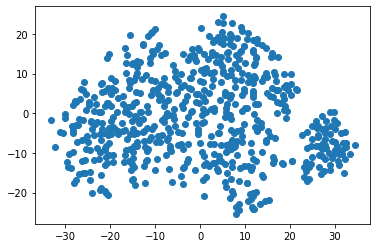

In [75]:
plt.scatter(features[:,0], features[:,1])
plt.show()

In [76]:
#K-means

cluster = [1,2,3,4,5,6,7,8,9,10]
empty = []

for i in cluster:
    k_means = KMeans(n_clusters=i, random_state=69)
    k_means.fit(features)
    empty.append(k_means.inertia_)
    

    
    
    

<function matplotlib.pyplot.show(close=None, block=None)>

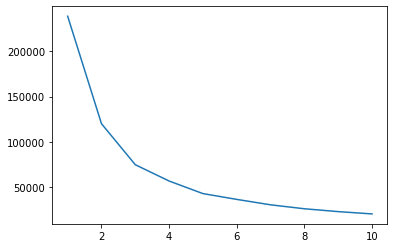

In [77]:
elbow = pd.DataFrame({'cluster':cluster, 'inertia':empty})
plt.plot (elbow['cluster'],elbow['inertia'])
plt.show

In [ ]:
# It appears as if patients can be clustered, in a minimum of three clusters, with a possibility of four. 
# In the scatterplot above, we see a distinct cluster in the bottom right corner.